# Assignment 3

Imports

In [20]:
import numpy as np
import scipy as sp
from scipy.optimize import dual_annealing
from scipy.integrate import solve_ivp
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from numba import jit, njit, prange
import math
import os
import sys
import sklearn as skl

Playground Raymond

Playground Calvin

Playground Jonas

In [45]:
def lv_model(x, t, alpha, beta, gamma, delta):
    """
    Lotka-Volterra model.
    """
    x1, x2 = x
    dx1 = alpha*x1 - beta*x1*x2
    dx2 = gamma*x1*x2 - delta*x2
    return np.array([dx1, dx2])

SEED = 33
np.random.seed(SEED)

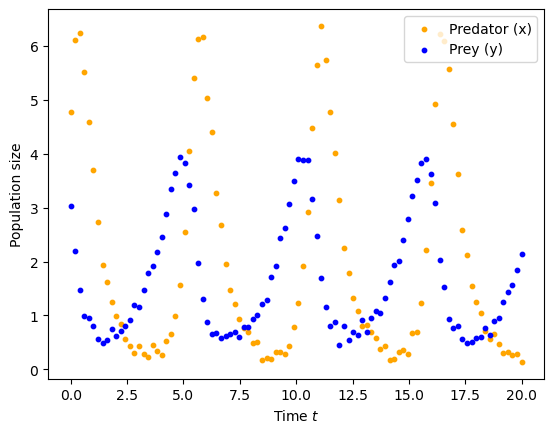

In [46]:
data = pd.read_csv('predator-prey-data.csv', index_col=0)
t = data['t']
x = data['x']
y = data['y']
plt.figure()
plt.scatter(t, x, label='Predator (x)', s=10, color='orange')
plt.scatter(t, y, label='Prey (y)', s=10, color='blue')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Population size')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/ss-assignment-3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Parameters: alpha = -1.379, beta = -0.923, gamma = -0.817, delta = -1.394


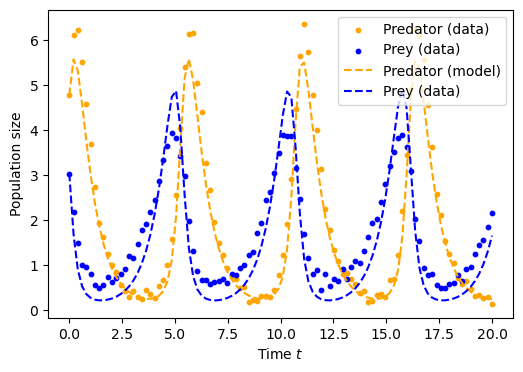

In [60]:
def objective_func(params, t, x, y):
    """
    Cost function for the Lotka-Volterra model.
    """
    alpha, beta, gamma, delta = params
    x0, y0 = x[0], y[0]
    x_pred, y_pred = sp.integrate.odeint(lv_model, [x0, y0], t, args=(alpha, beta, gamma, delta)).T
    return np.sum((x_pred - x)**2 + (y_pred - y)**2)

# TODO find smarter bounds
bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
res = dual_annealing(objective_func, args=(t, x, y), bounds=bounds, maxiter=1_000, no_local_search=True, seed=SEED)
alpha, beta, gamma, delta = res.x
print(f'Parameters: alpha = {alpha:.3f}, beta = {beta:.3f}, gamma = {gamma:.3f}, delta = {delta:.3f}')

plt.figure(figsize=(6, 4))
plt.scatter(t, x, label='Predator (data)', s=10, color='orange')
plt.scatter(t, y, label='Prey (data)', s=10, color='blue')
plt.plot(t, sp.integrate.odeint(lv_model, [x[0], y[0]], t, args=(alpha, beta, gamma, delta)).T[0], label='Predator (model)', color='orange', linestyle='--')
plt.plot(t, sp.integrate.odeint(lv_model, [x[0], y[0]], t, args=(alpha, beta, gamma, delta)).T[1], label='Prey (data)', color='blue', linestyle='--')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Population size')
plt.show()

## General stuff about Lotka-Volterra equations

and any visualizations we need

Removing samples functionality

## Objective functions

## Optimization algorithms

In [24]:
# Hill climbing

In [25]:
# 3rd optimization algorithm

In [26]:
# Simulated Annealing

## Experiments and plots

#### How many data-points from each time-series you could remove until you are not able to reverse-engineer the parameters any more?

First, try to ﬁnd the importance of each time-series on reverse-engineering process by ﬁxing one time-series and removing data-points from the other one. In this way, you will ﬁnd the critical number of data-points for each time-series.

Then, if you combine two reduced time-series, could you still infer the parameters?

Does removing every data-point have the same effect on reverse-engineering process? In other words, what are the points that you could remove safely without affecting the inferance procedure? and what are those with critical effects on the process?

#### \<Extra question\>